In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imdb = pd.read_csv("../dados/imdb.csv")

## Gráficos de dispersão

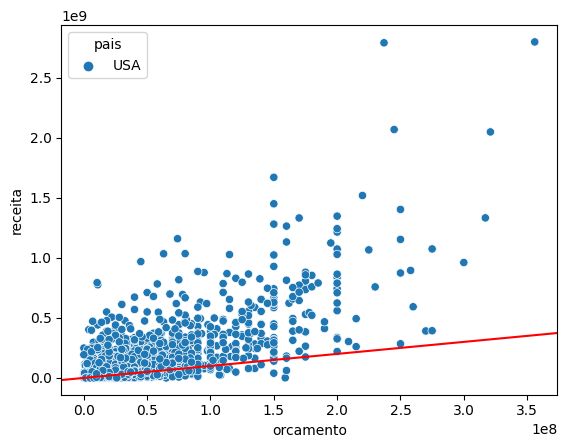

In [6]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita", hue="pais")
plt.axline([0,0], slope = 1, color = 'red')

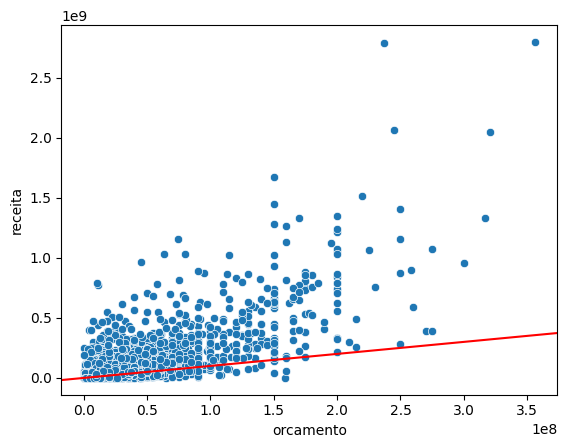

In [7]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita")
plt.axline([0,0], slope = 1, color="red")


In [ ]:
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro")

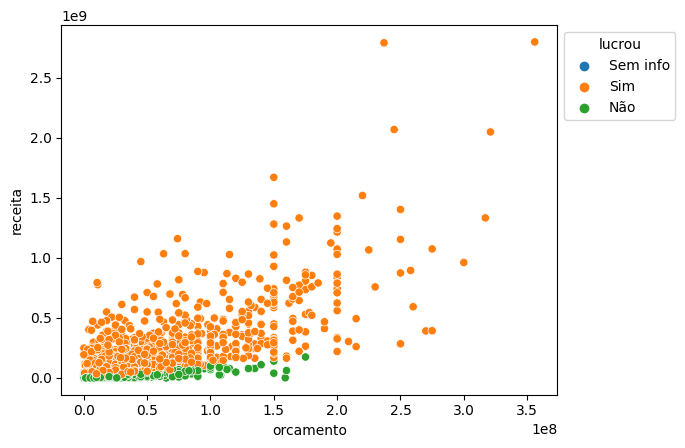

In [19]:
imdb_lucro2 = imdb.assign(
    lucrou = lambda x: np.select(
        [x.receita > x.orcamento, x.receita <= x.orcamento],
        ["Sim", "Não"],
        "Sem info"
    )
)
g1=sns.scatterplot(data=imdb_lucro2, x="orcamento", y ="receita", hue="lucrou")

sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))

<AxesSubplot: xlabel='orcamento', ylabel='receita'>

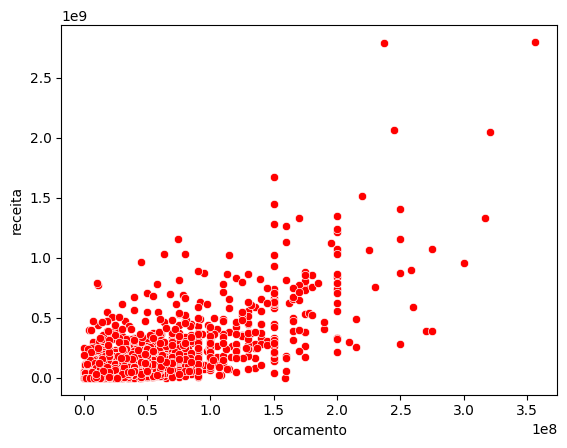

In [20]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita", color="red")

<AxesSubplot: xlabel='orcamento', ylabel='receita'>

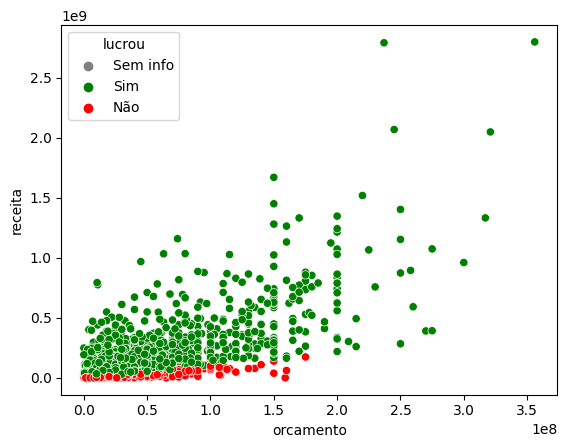

In [21]:
sns.scatterplot(data=imdb_lucro2, x="orcamento", y ="receita", hue="lucrou", palette = {
    "Sem info": "gray",
    "Sim": "green",
    "Não": "red"
})

<AxesSubplot: xlabel='orcamento', ylabel='receita'>

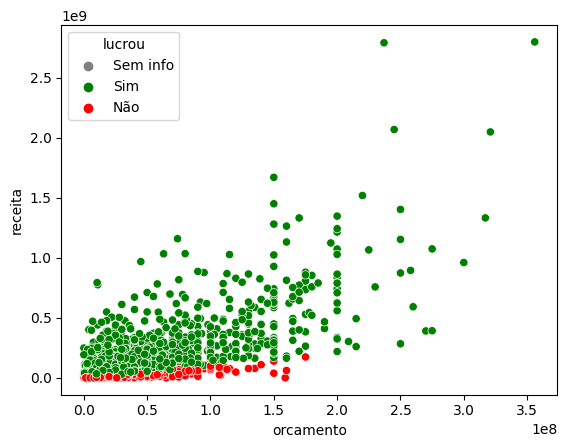

In [22]:
paleta={
    "Sem info": "gray",
    "Sim": "green",
    "Não": "red"
}
sns.scatterplot(data=imdb_lucro2, x="orcamento", y ="receita", hue="lucrou", palette = paleta)

## Gráficos de linha

<AxesSubplot: xlabel='ano', ylabel='nota_media'>

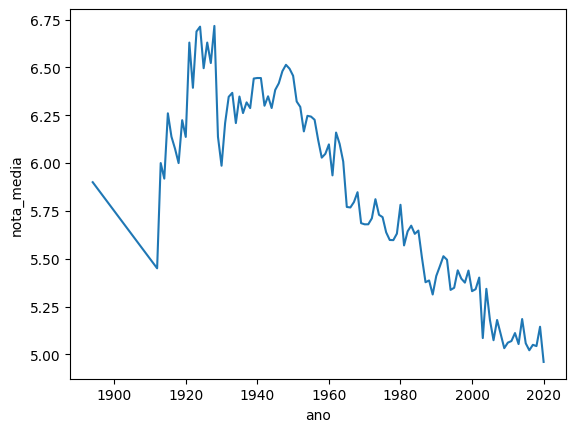

In [6]:
notas_por_ano = (imdb.
                    groupby("ano", as_index=False).
                    agg(
                        nota_media = ("nota_imdb", "mean")
                    ))
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")

In [4]:
import seaborn.objects as so

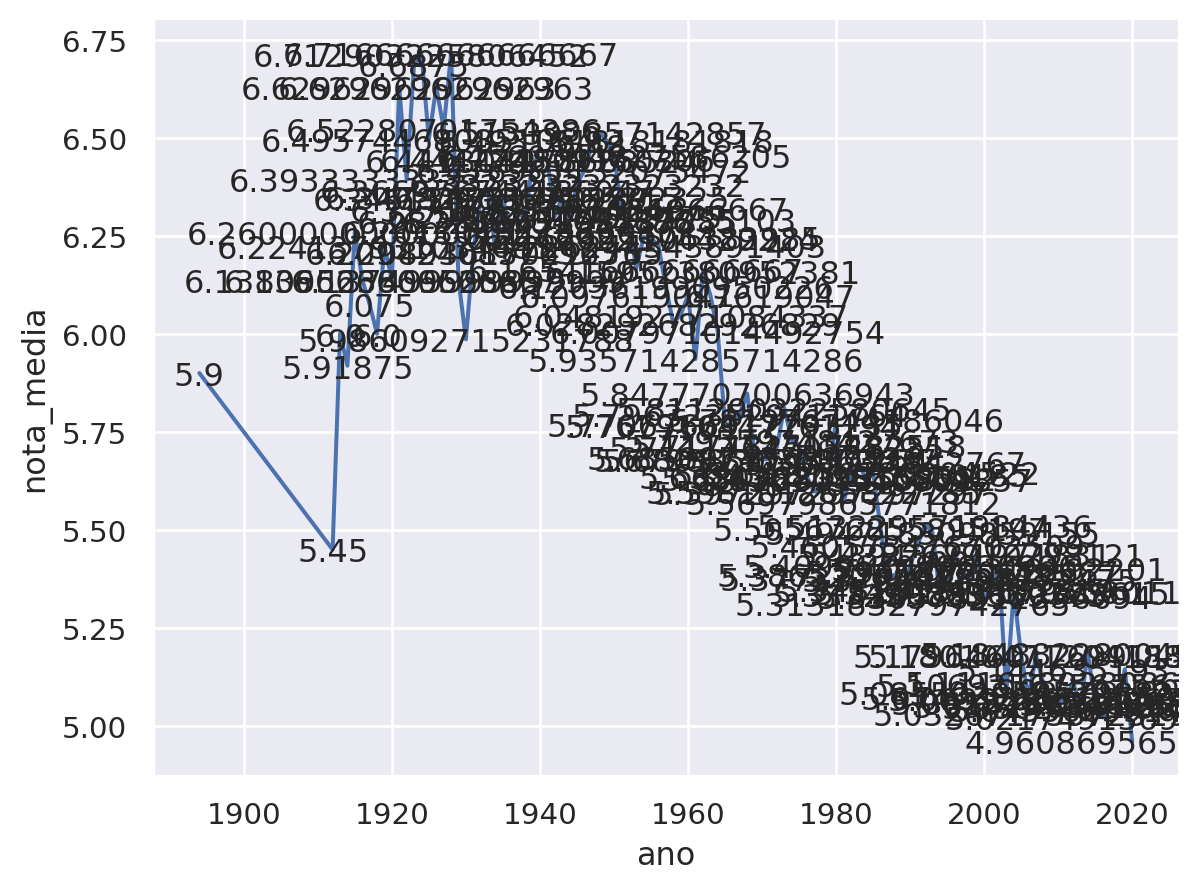

In [7]:
so.Plot(notas_por_ano, x="ano", y="nota_media", text = "nota_media").add(so.Line()).add(so.Text())

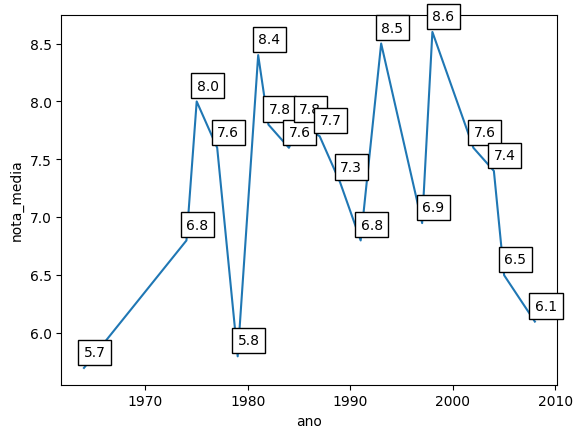

In [26]:
notas_spielberg = (imdb.
    query("direcao == 'Steven Spielberg'").
    groupby("ano", as_index=False).
    agg(
        nota_media = ("nota_imdb", "mean")
    )
)
plot = sns.lineplot(data=notas_spielberg, x="ano", y="nota_media")
for _, ano, nota_media in notas_spielberg.itertuples():
    plot.annotate(round(nota_media,1), (ano, nota_media + 0.1), bbox={"facecolor":'white'})


## Gráficos de barras

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Michael Curtiz'),
  Text(1, 0, 'Lesley Selander'),
  Text(2, 0, 'Lloyd Bacon'),
  Text(3, 0, 'William Beaudine'),
  Text(4, 0, 'John Ford'),
  Text(5, 0, 'Gordon Douglas'),
  Text(6, 0, 'Richard Thorpe'),
  Text(7, 0, 'Mervyn LeRoy'),
  Text(8, 0, 'Norman Taurog'),
  Text(9, 0, 'Raoul Walsh')])

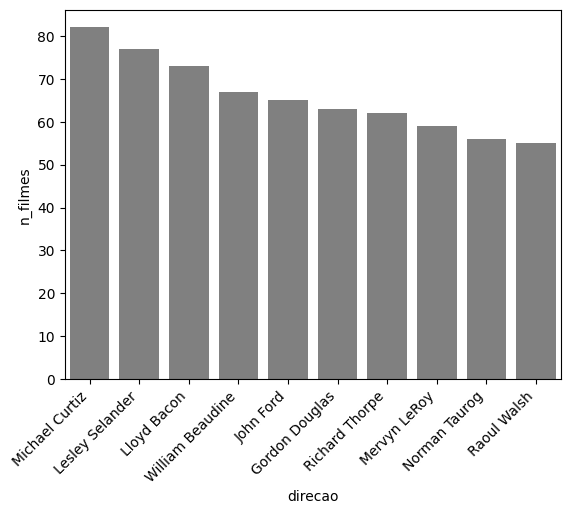

In [35]:
top_direcao = (imdb.
    groupby("direcao", as_index=False).
    agg(
        n_filmes = ("titulo", "count")
    ).
    nlargest(10, "n_filmes").
    sort_values("n_filmes", ascending=False)
)
sns.barplot(top_direcao, x="direcao", y="n_filmes", color="grey")
plt.xticks(rotation=45, ha='right')


<AxesSubplot: xlabel='n_filmes', ylabel='direcao'>

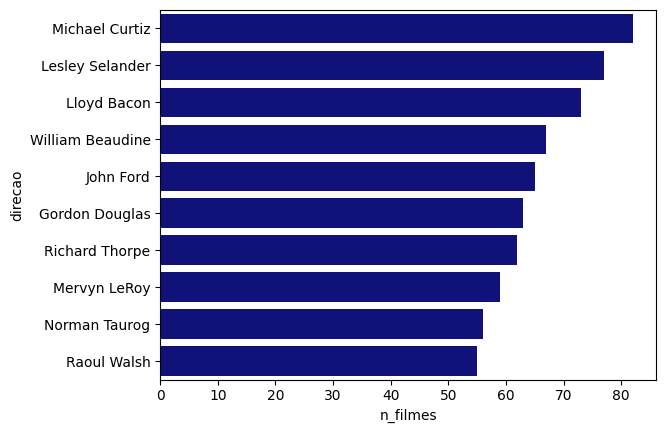

In [37]:
sns.barplot(top_direcao, x="n_filmes", y="direcao", color = "darkblue")

## Gráficos de distribuição

<AxesSubplot: xlabel='lucro', ylabel='Count'>

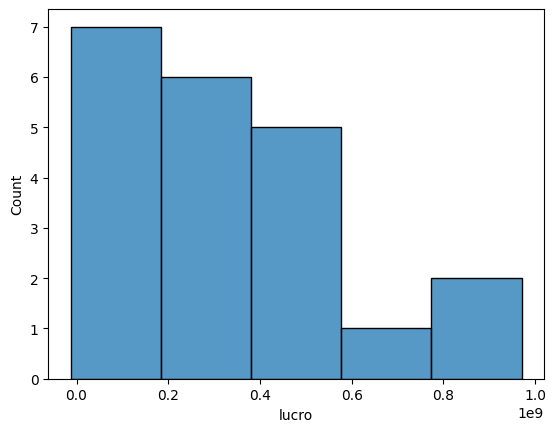

In [38]:
lucro_spielberg = (imdb.
    query("direcao=='Steven Spielberg'").
    assign(lucro=lambda x: x.receita-x.orcamento)
    )
sns.histplot(data=lucro_spielberg, x="lucro", bins=5)

<AxesSubplot: xlabel='lucro', ylabel='Count'>

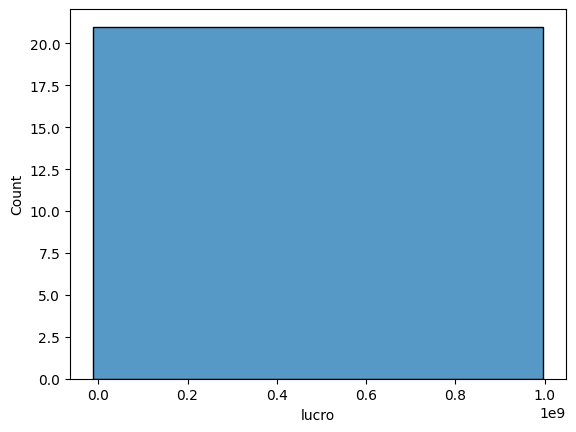

In [40]:
sns.histplot(data=lucro_spielberg, x="lucro", binwidth=100000000)

In [ ]:

(imdb.assign(
    n_filmes = imdb.groupby("direcao")["titulo"].transform("nunique") # mantem o mesmo número de informações do banco
).filter(["direcao", "n_filmes"]).sort_values("n_filmes", ascending=False))

imdb.value_counts("direcao")


In [9]:
imdb.groupby("direcao").agg(n_filmes = (["titulo","munique"]))

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Michael Curtiz'),
  Text(1, 0, 'Lloyd Bacon'),
  Text(2, 0, 'John Ford'),
  Text(3, 0, 'Raoul Walsh'),
  Text(4, 0, 'William A. Seiter'),
  Text(5, 0, 'William A. Wellman')])

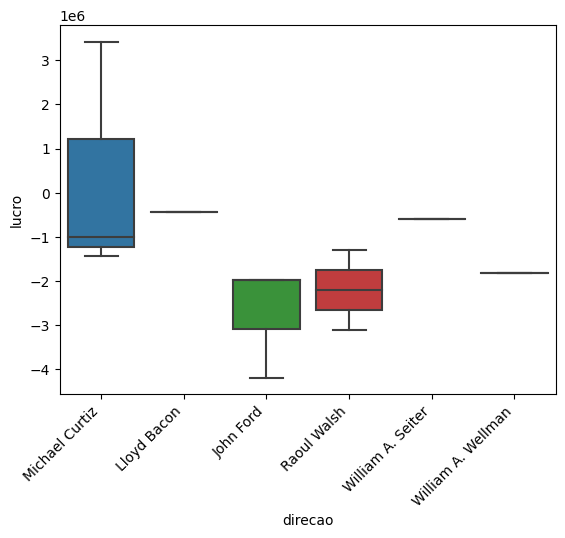

In [10]:
direcao_com_mais_filmes = (imdb.
    query("~direcao.isnull()"). #negação é com til
    assign(
        n_filmes = lambda x: x.groupby("direcao")["direcao"].transform("count"),
        lucro = lambda x: x.receita - x.orcamento
    ).
    query("n_filmes > 50 & ~lucro.isnull()").
    sort_values("n_filmes", ascending=False)
)

sns.boxplot(data=direcao_com_mais_filmes, x="direcao", y = "lucro")
plt.xticks(rotation=45, ha='right')

## Titulos labels, etc

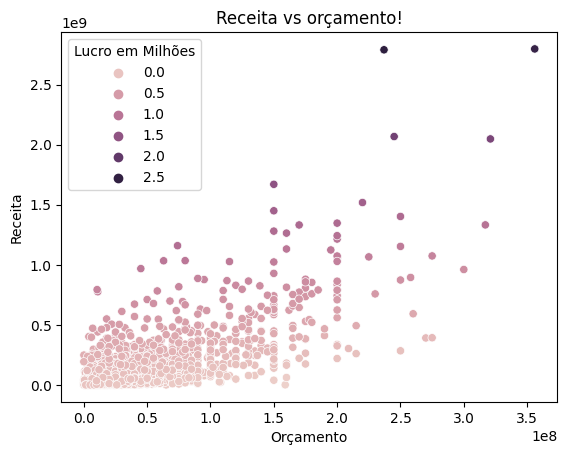

In [11]:
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro")
plt.xlabel("Orçamento")
plt.ylabel("Receita")
plt.title("Receita vs orçamento!")
plt.legend(title="Lucro em Milhões")

([<matplotlib.axis.XTick at 0x7f67b3b58460>,
 [Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1920, 0, '1920'),
  Text(1930, 0, '1930'),
  Text(1940, 0, '1940'),
  Text(1950, 0, '1950'),
  Text(1960, 0, '1960'),
  Text(1970, 0, '1970'),
  Text(1980, 0, '1980'),
  Text(1990, 0, '1990'),
  Text(2000, 0, '2000'),
  Text(2010, 0, '2010')])

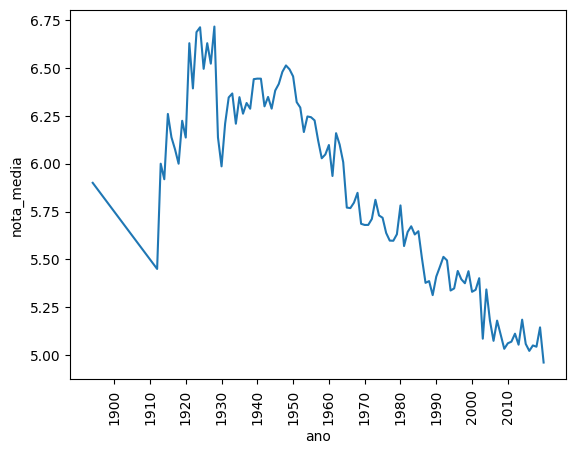

In [12]:
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")
plt.xticks(range(1900, 2020, 10), rotation=90)

(1930.0, 2030.0)

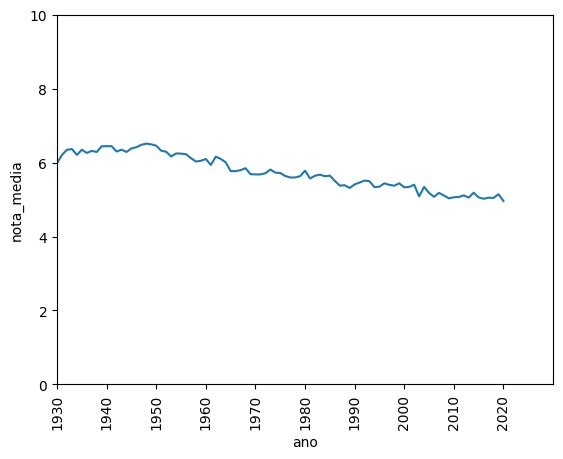

In [13]:
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")
plt.xticks(range(1900, 2030, 10), rotation=90)
plt.ylim(0, 10)
plt.xlim(1930, 2030)

<AxesSubplot: xlabel='ano', ylabel='nota_media'>

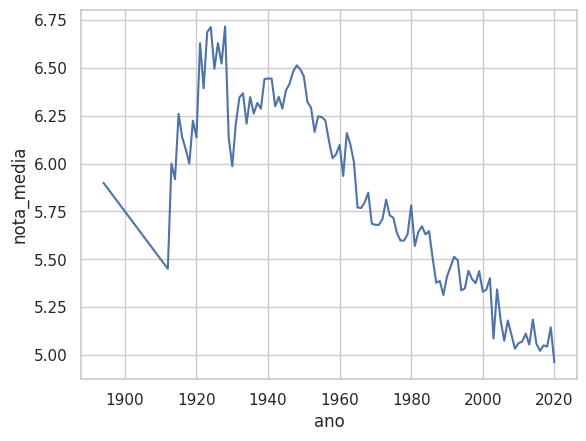

In [14]:
sns.set_theme()
sns.set_theme(style="whitegrid")
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")

## Facets

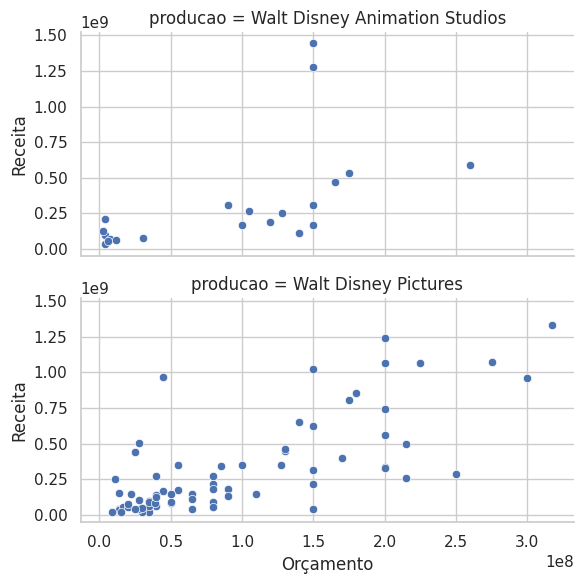

In [16]:
disney = imdb[imdb.producao.isin(["Walt Disney Animation Studios", "Walt Disney Pictures"])]
g = sns.FacetGrid(disney, col="producao", col_wrap=1, aspect=2)
g.map(sns.scatterplot, "orcamento", "receita")
g.set_ylabels("Receita")
g.set_xlabels("Orçamento")

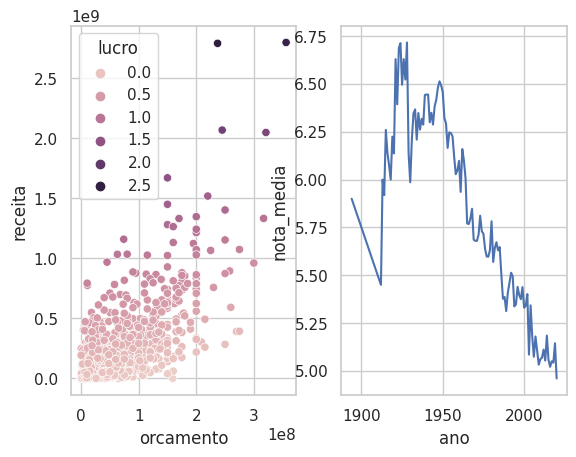

In [17]:
fig, axes = plt.subplots(1, 2)
plt.subplots(1, 2)
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro", ax = axes[0])
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media", ax=axes[1])
plt.close() # para não duplicar o gráfico no jupyter.


## Futuro mais parecido com ggplot?

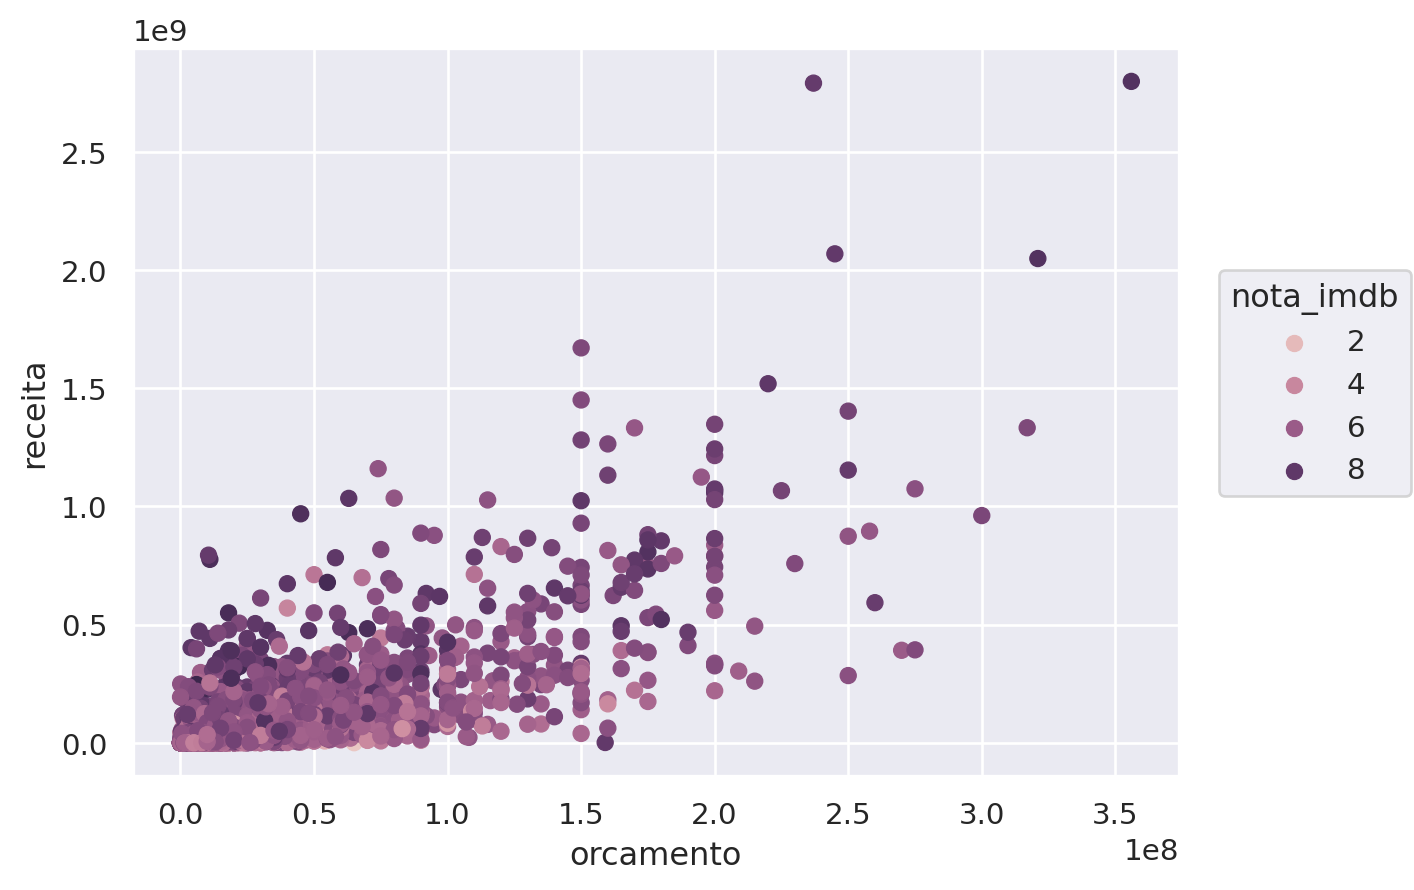

In [3]:
from seaborn import objects as so
# https://seaborn.pydata.org/tutorial/objects_interface.html

(
    so.Plot(
        imdb, x="orcamento", y="receita",
        color="nota_imdb"
    )
    .add(so.Dot())
)